<a href="https://colab.research.google.com/github/mwahajkhan/Supervised-ML-Regression-/blob/main/Regularization_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

* Goal: Regularization to improve the performance of the holdout sets.

* Given a sparse Data set, X_Y_Sinusoid_Data.csv, contains column of 'x' data, and associated 'y' noisy data. The data has data points, which is the actual underlying function, along with noise. Using the regression, polynomial features, and regularization to comeup with underlying model.

**Performing:**

*  Regression

* Polynomial Features

* Rgularization

## **Part 1:**

* Importing the data.

* Generating approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculating the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plotting the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path = '/content/sample_data/X_Y_Sinusoid_Data.csv'

data = pd.read_csv(path)


#np.linspace generates 100 values between the ranges 0-100
X_real = np.linspace(0, 1.0, 100)

#Y is a function of each one of the X values``fnc: 𝑦=𝑠𝑖𝑛(2𝜋𝑥)
Y_real = np.sin(2 * np.pi * X_real)

In [5]:
#actual function with noise
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [6]:
X_real

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [7]:
Y_real

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

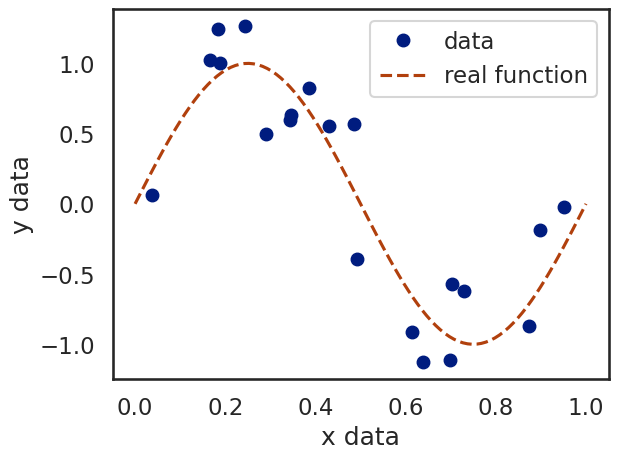

In [8]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

#Plotting noisy sparse
#assign 'x column', and 'y column' data value, ls = dotted line style,
ax = data.plot('x','y', ls='', marker='o', label='data')

#looking at the actual real function
#Plotting X_real and Y_real, being the values between zero and one, and are relating according to the actual function Y's.
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

*Goal is to find a model that fits closely to the red line, and ignore the noise, because of which the blue dots are not on the line. Trying to find a balance between 'BIAS' and 'VARIRANCE'.*

## **Part 2:**

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, creating 20th order polynomial features.
*   Fitting this data using linear regression.
*   Plotting the resulting predicted value compared to the calculated data.

 `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


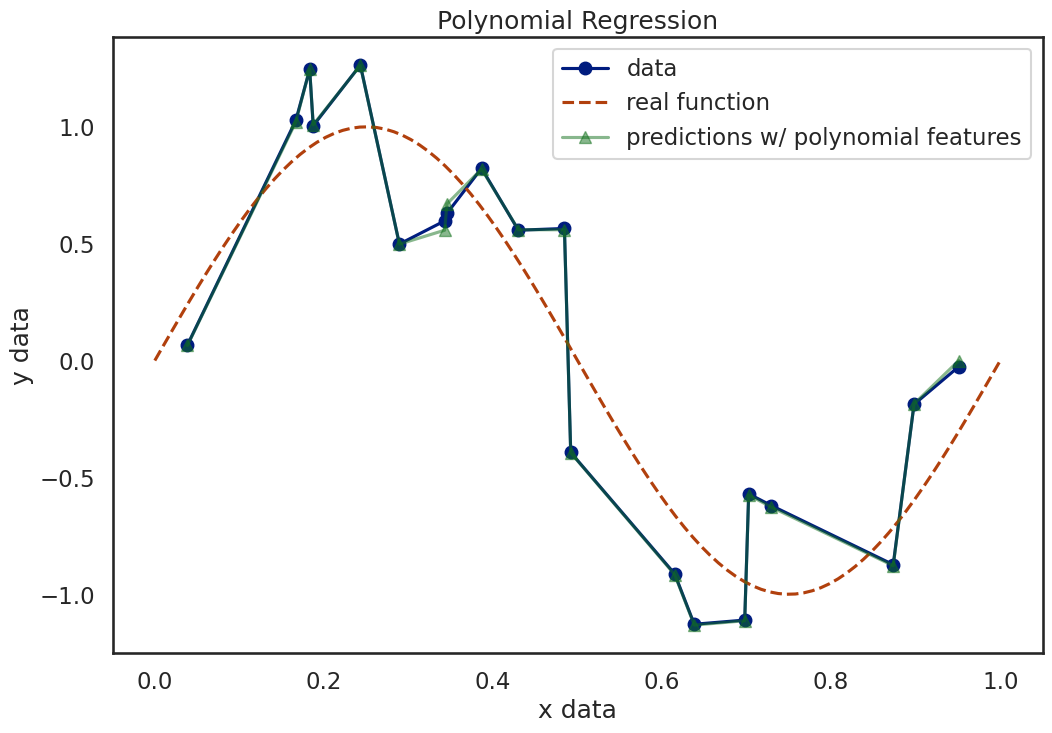

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Setup the polynomial features
#passing degree as hyper parameter
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

#Extract the X- and Y- data from the dataframe
#passing the data dataframe [[]](PF requires) as two-dimensional array or DataFrame
X_data = data[['x']]
Y_data = data['y']

#Ceeate the features and fit the model
 #Transforming data into 20 degree polynomial
X_poly = pf.fit_transform(X_data)

#fitiing linear regression, on transformed X polynomials and original Y_data
lr = lr.fit(X_poly, Y_data)

#Predict the values on same values we trained on
Y_pred = lr.predict(X_poly)

#Plot the result
  #Plot X and Y data in original form
plt.figure(figsize=(12,8))
plt.plot(X_data, Y_data, marker='o', ls='-', label='data', alpha=1)

  #Plot X and Y data in real polynomial form
plt.plot(X_real, Y_real, ls='--', label='real function')

  #Plot X and Y data in predicted form (Y_pred)

plt.plot(X_data, Y_pred, marker='^', alpha=0.5, label='predictions w/ polynomial features')

plt.title('Polynomial Regression')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

**Conclusion:**
* 20 degree Polynomial fit perfectly for dataset

* 20 degree Polynomial is not good generalization to new data

* Example of overfitting, as polynomial degree is too high.


## **Part 3:**

*   Performing regression using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plotting the results
*   Plotting the magnitude of the coefficients obtained from these regressions,compared with those obtained from linear regression in the previous part. The linear regression coefficients are plotted separately due to their large magnitude.

Interpretating the comparatively large magnitude of the data and the role of regulartization.

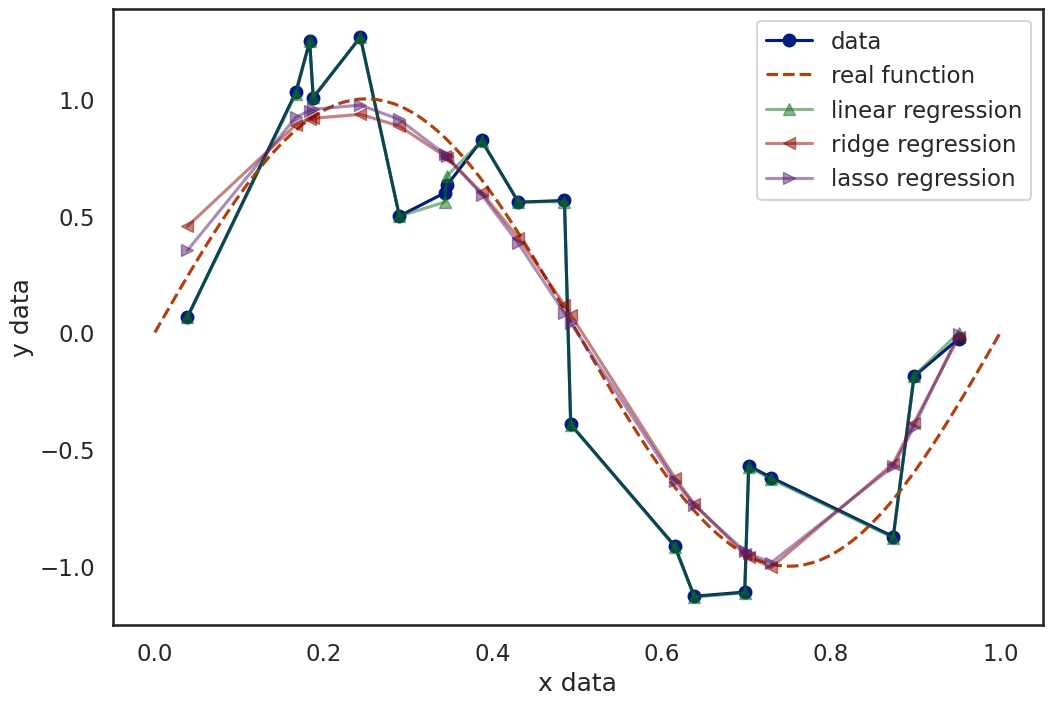

In [10]:
#Mute sklearn warning about regularization

import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

#The ridge regression model

rr = Ridge(alpha=0.001)

#X_poly defined before is a 20 deg polynomial
rr.fit(X_poly, Y_data)

#Come up with predictions after fit on training data
Y_pred_rr = rr.predict(X_poly)



#The lasso regression model
  #Setting desired alpha hyper parameter
lassor = Lasso(alpha=0.0001)
  #Firt fit on 20 deg polynomial
lassor = lassor.fit(X_poly, Y_data)
  #Predict on same values we trained on 20 deg polynomial
Y_pred_lr = lassor.predict(X_poly)



#The plot of the predicted values

plt.figure(figsize=(12,8))
  #Plot X and Y data in original form
plt.plot(X_data, Y_data, marker='o', ls='-', label='data')

  #Plot X and Y data in actual underlying function
plt.plot(X_real, Y_real, ls='--', label='real function')

  #Plot X and Y data in predicted form by lr without any regularization (Y_pred)
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=0.5)



  #Plot X and Y data in Ridge regression predicted form (Y_pred_rr)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='<', alpha=0.5)

  #Plot X and Y data in Lasso regression predicted form (Y_pred_lR)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='>', alpha=0.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [11]:
#absolute value of coefficents for each model
  # .ravel(), ravels array into single record
  #.coef_ extracts all the co efficents

coefficents = pd.DataFrame()
coefficents['Linear regression'] = lr.coef_.ravel()
coefficents['Ridge regression'] = rr.coef_.ravel()
coefficents['Lasso regression'] = lassor.coef_.ravel()
coefficents = coefficents.applymap(abs)

coefficents.describe()

,Linear regression,Ridge regression,Lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,2.169397,2.167284
std,6.005692e+13,2.900278,4.706731
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,0.467578,0.000000
50%,3.625543e+13,1.017272,0.252181
75%,1.068105e+14,2.883507,1.641353
max,1.650270e+14,12.429635,20.176708


In [12]:
(coefficents>0).sum()

Linear regression    21
Ridge regression     20
Lasso regression     15
dtype: int64

* *Huge difference between the min and max values of Lasso & Ridge  vs  Linear Regressions*

* *Coefficents greater then 0 reduced as Lasso applied more coefficent reduction thus made more features 0*

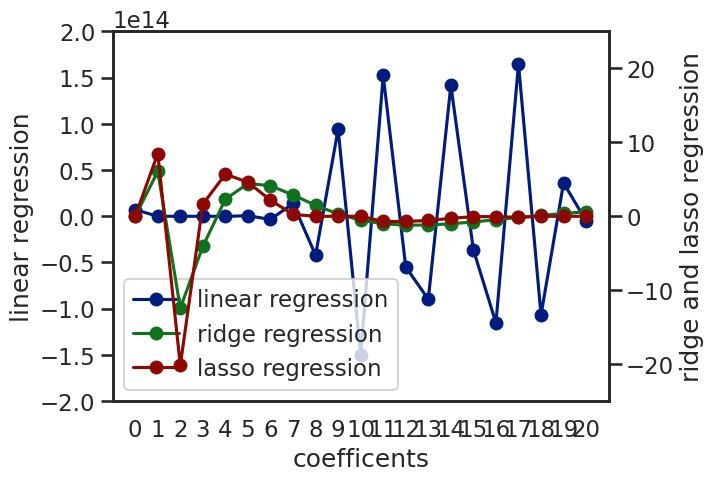

<Figure size 2200x800 with 0 Axes>

In [13]:
colors = sns.color_palette()


#Setup the dual axis, 2 bounding box
  #Create a first axis
ax1 = plt.axes()

  #Create a second axis,
  #.twinx() copies the box plots on a copy of initial axis
  #Same x but we can change y variables
ax2 = ax1.twinx()
plt.figure(figsize=(22,8))

#Plot the linear regression data
ax1.plot(lr.coef_.ravel(),
         color=colors[0], marker='o', label='linear regression')

#Plot the regularization data sets
ax2.plot(rr.coef_.ravel(),
         color=colors[2], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(),
         color=colors[3], marker='o', label='lasso regression')

#Customizing the scale

ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

#Combine the legends
  #.get_legend_handles_labels() handles both labels and handles

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficents', ylabel='linear regression')
h2, l2 = ax2.get_legend_handles_labels()
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

* *For linear regression there is a lot of fluctuation values for linear regression coefficents.*

* *Lasso and Ridge tend to zero out or get closer to zero for a lot of coefficents.*

## **Part 4:**

* Importing the **"Ames_Housing_Sales.csv"** dataset.

* Data Cleaning (Remove null values, one-hot-encode categoricals)

* Splitting data in training and test sets

* Log transform skewed features

**Importing Data**

In [14]:
#Method 1

data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [15]:
path = '/content/sample_data/Ames_Housing_Sales.csv'

data = pd.read_csv(path)
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [16]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64

In [17]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

**Creating list of categorical scolumns, and one hote encode using pandas get_dummies**



In [18]:
#get_dummies by default converts any column of type object into dummy variable
#dropping first columns so not strong multicollinearity
data = pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

In [19]:
data.dtypes.value_counts()

bool       204
float64     21
int64       16
Name: count, dtype: int64

In [20]:
print(data.apply(lambda x: x.dtype).value_counts())


bool       204
float64     21
int64       16
Name: count, dtype: int64


In [21]:
len(data.columns)

241

**Splitting data in train test splits**

*Train test becomes 70% of data, and test set becomes 30% of data.*


In [22]:
from sklearn.model_selection import train_test_split

#Only passing in data not X and y variables
#So only two output rather the X_train, y_train, X_test, y_test

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [23]:
#Creating a list of float columns to check for skewness
#List of columns that are not one-hot-encoded
#for values in a column at least more then 2 unique values
#this will ignore column with 1/0 or the boolean categorical columns
mask = data.apply(lambda x: x.nunique()) > 2
num_cols = data.columns[mask]

In [24]:
#Skew limit above which we will transform
skew_limit = 0.75

#filter to num_cols which we defined, and check skew of each
#skew_vals dataframe that has index, col names, and skew value of the column
skew_vals = train[num_cols].skew()

#skew_vals > skew_limit filter above 0.75
skew_cols = (skew_vals[skew_vals > skew_limit]
             .sort_values(ascending=False)
             .to_frame()          #to put in a dataframe
             .rename(columns={0: 'Skew'}))  #rename column to skew

skew_cols


,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
KitchenAbvGr,5.497813
ScreenPorch,4.599803
BsmtFinSF2,4.466378
BsmtHalfBath,3.882163
EnclosedPorch,3.218303


Transforming all the columns where the skew is greater than 0.75, excluding "SalePrice".


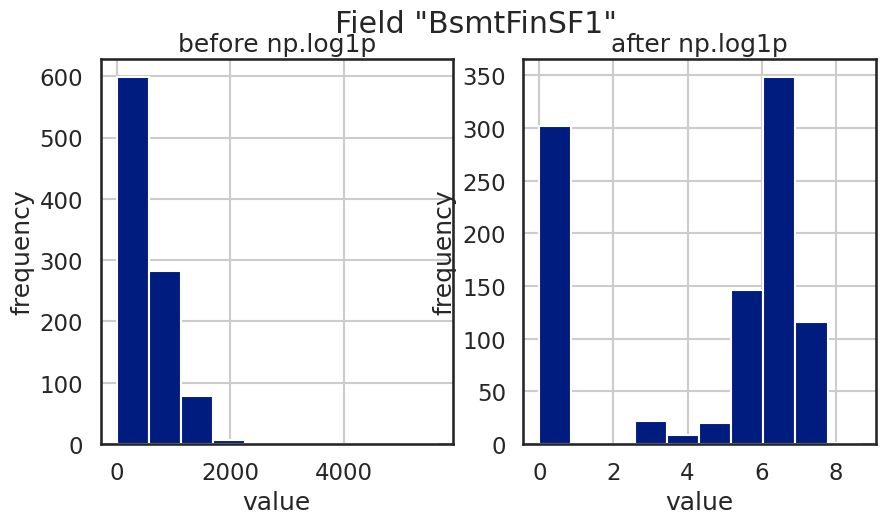

In [25]:
#Visualizing transformation after applying np.log1p on "BsmtFinSF1"

field = "BsmtFinSF1"

#plt.subplot will be overall figure, and we plot seprate axis(bounding box) on top
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)

#Applying log transformation
#log1p adds +1 and transforms, for zero values to not error out
train[field].apply(np.log1p).hist(ax=ax_after)

#Setting labels
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')

#title for overall figure
fig.suptitle('Field "{}"'.format(field));

> *Log transformation created a more normally distributed graph*

**Going through all the columns excpet 'Sales Price" and log transform them

In [26]:
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
  if col != 'SalePrice': #(pass if column == 'sale price')

  #perfirm log transformation and save for train and test
  #different way to do same thing
    train[col] = np.log1p(train[col])
    test[col] = test[col].apply(np.log1p)

**Sepearting features from predictor**

*Sepearating value we are predicting from features.*

In [27]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

## **Part 5:**

* Writing function rmse that inputs truth, and prediction values, and returns *Root_mean_square_error*



In [28]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_predicted):
  return np.sqrt(mean_squared_error(y_true, y_predicted))

* ****

* *Fit linear regression model*

* *Printing the root-mean-squared error for this model*

* *Plotting the predicted vs actual sale price based on the model*

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, lr.predict(X_test))

print(linearRegression_rmse)

41990.51181064195


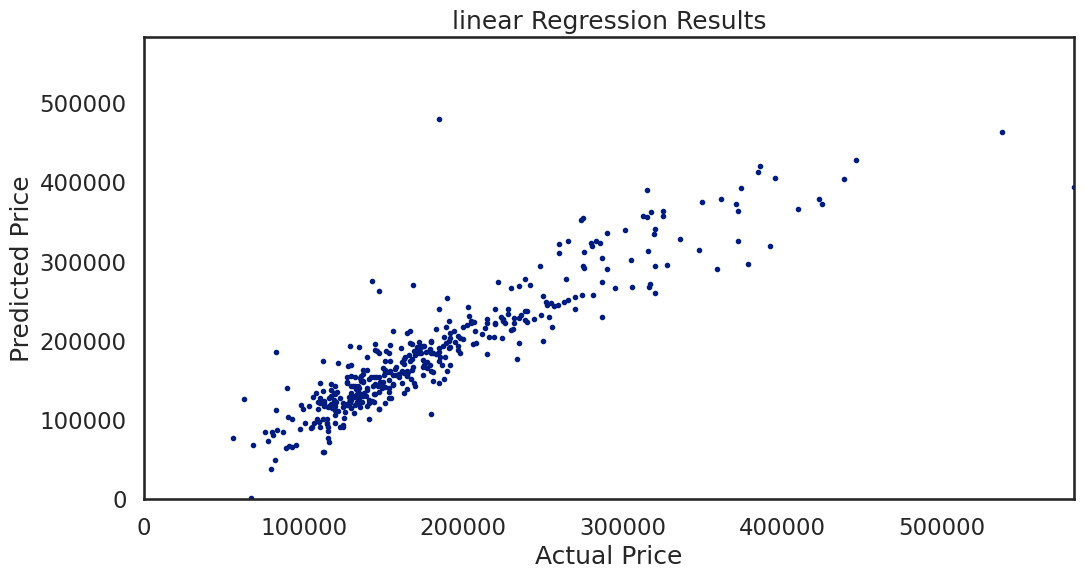

In [30]:
f = plt.figure(figsize=(12,6))
ax = plt.axes()

ax.plot(y_test, lr.predict(X_test),
        marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim,
       title='linear Regression Results');



## **Part: 6**

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fitting a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plotting the RMSE using the cross validated error function created above.
*   Using $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*  Repeating the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


* **Grid Search CV** : *Goes through different yperparameters for a given model, also does the train and test splits depending on how we want to cross validate.*


* **Ridge CV is the same as GridSearchCV, with model directly specified as RIDGE.**

In [31]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]


#This step includes both, CV object initiation, and fitting
ridgeCV = RidgeCV(alphas=alphas,
                  cv=4).fit(X_train, y_train)     #cv=4 specifies we want 4 training test splits

#Given the model fitted to X_train, y_train
#How will it able to predict actual values(y_test), with predicted values for test set
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))


#.alpha_ value is is the alpha value which optimizes the model
print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 32194.32903297106


*10 is the ideal alpha value, and 32194.33 is Root mean squared error*

## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fitt a Lasso model using cross validation and determining the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeating this with the Elastic net model.
*   Compare the results via table and/or plot.

Using the following alphas:\
`[0.0005, 0.005, 0.1, 1, 5, 20, 50, 80, 100, 120, 140]`

**RidgeCV** function is going to use the L1 regularization function, as well as the cross-validation. If call L1 regularization, it is taking the absolute value of those coefficients. So again, reducing those coefficients, but this time selectively shrinking some of those coefficients effectively performing feature elimination.

In [38]:
from sklearn.linear_model import LassoCV

#in lasso it looks at coefficents then squared coefficents in rdige
#therefor choosing different alphas to come with optimal model
alphas2 = [0.0005, 0.005, 0.1, 1, 5, 20, 50, 80, 100, 120, 140]

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=4).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

120.0 36967.81416706615


Detrmining the number of features that remain zero.

In [39]:
print('of {} coefficients, {} are on zero with Lasso.'.format(len(lassoCV.coef_),
                                                             len(lassoCV.coef_.nonzero()[0])))

of 240 coefficients, 101 are on zero with Lasso.


**

* *Lasso has reduced or eliminated more then half the original coefficents*

**Trying the elastic net, with the same alphas as in Lasso[0.0005, 0.005, 0.1, 1, 5, 20, 50, 80, 100, 120, 140], and l1\_ratios between 0.1 and 0.9
**


* **Grid Search CV** : *Goes through different yperparameters for a given model, also does the train and test splits depending on how we want to cross validate.*

* **Elastic Net CV is the same as GridSearchCV with model already specified as ElasticNet** *Elastic Net CV has cross validation built in.*

* *In elastic Net takes the lambda value and dedicated half the portion to Ridge, and half its portion to lasso.*

* *0.1 will be lot weight on Ridge, and 0.9 will ve more weight on Lasso*

In [41]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2,
                            l1_ratio=l1_ratios,
                            max_iter = 10000).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.1 0.9 32201.40957906721


**Calculating the RMSE of all the models in a table for comparison**

In [49]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']



rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df


,RMSE
Linear,41990.511811
Ridge,32194.329033
Lasso,36967.814167
ElasticNet,32201.409579


**Depending on what we want to achieve from model:**

* *Lasso if we want to reduce lot of coefficents and perform feature selection.*

* *Ridge if we want to run these quickly.*

* *Elastic Net if we want to find the perfect balance between lasso and ridge*

**Plotting actual vs predicted housing prices**

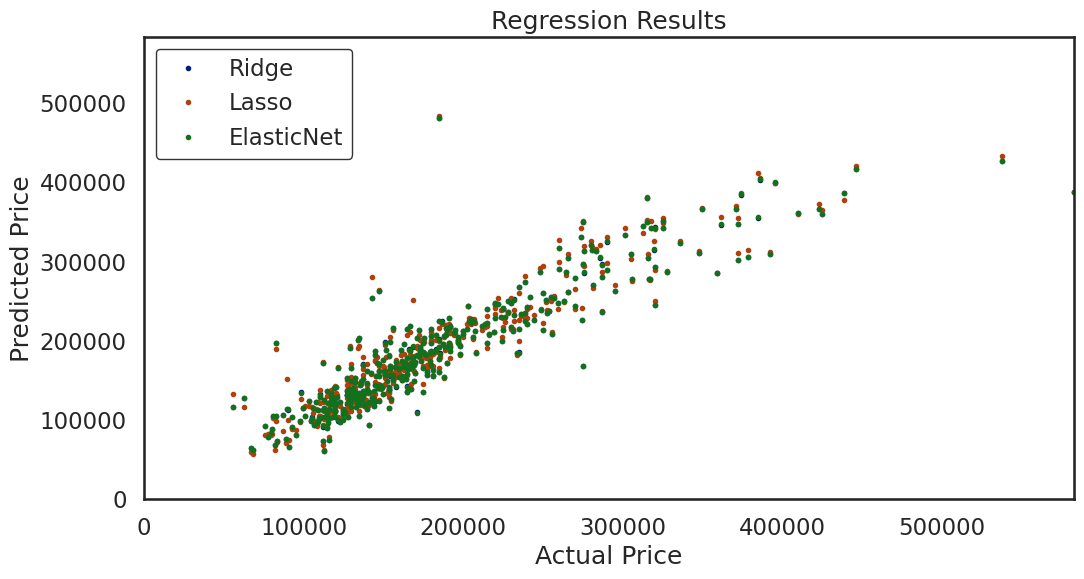

In [47]:
f = plt.figure(figsize=(12,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

#with zip acccess them as a list of tuples where each tuple is a model aswell label
for mod, lab in zip(models, labels):
  ax.plot(y_test, mod.predict(X_test),  #y_test actual value vs the predicted value
          marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim,
       title='Regression Results');